In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from sklearn.mixture import GaussianMixture

# there is an error in the scikilearn implmentation of Kmeans causing 
# a memory leak, these lines should both avoid leak and suppress warnings
import os
os.environ["OMP_NUM_THREADS"]="2"
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

def gaussian_mixture(file_name):
    
    #retrieve the player's name and hitting data from csv
    name = file_name[:-4]
    name = name[0].upper() + name[1:]
    data = pd.read_csv(file_name, header=None)
    data = data.dropna()
    data.columns = ['Exit Velocity','Launch Angle']
    X = np.array(data)

    #calculate BIC for 1,2,3 and 4 clusters
    BIC = []
    for i in range(1, 5):
        #fit Gaussian Micture Model
        gmm = GaussianMixture(n_components=i, covariance_type="full", 
        init_params = 'kmeans', n_init = 25, random_state=42).fit(X)
        #store BIC
        BIC.append(gmm.bic(X))
    
    #choose the number of clusters yeilding the minimum BIC
    optimal_num = BIC.index(min(BIC))

    #fit optimal Gaussian Micture Model
    gmm = GaussianMixture(n_components=optimal_num, covariance_type="full", 
    init_params = 'kmeans', n_init = 25, random_state=42).fit(X)

    #form grid over data for plotting
    X, Y = np.mgrid[data['Exit Velocity'].min() - 10:data['Exit Velocity'].max() + 10:1, 
                data['Launch Angle'].min() - 10:data['Launch Angle'].max() + 10:1]
    
    #evaluate density at each point
    pos = np.array([X.ravel(), Y.ravel()]).T
    Z = np.exp(gmm.score_samples(pos))
    Z = Z.reshape(X.shape)

    plot_heat_map(X,Y,Z,data,name)

def plot_heat_map(X,Y,Z,data,name):
    #form contour plot
    plt.contourf(X, Y, Z,levels=100,cmap='rocket')
    #overlay actual data points
    plt.scatter(x=data['Exit Velocity'], y=data['Launch Angle'], alpha=0.2, c='white')
    #set chart labels and title
    plt.xlabel('Exit Velocity')
    plt.ylabel('Launch Angle')
    plt.title('')
    if (name[-1] == 's'): plt.title(name + "' Probability Density Estimate")
    else: plt.title(name + "'s Probability Density Estimate")
    plt.show()

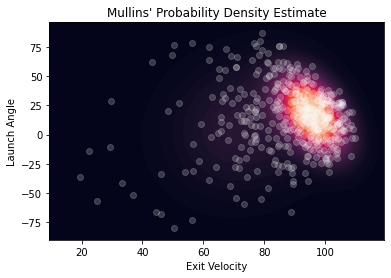

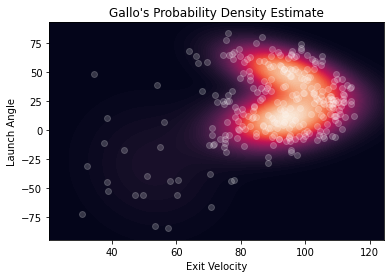

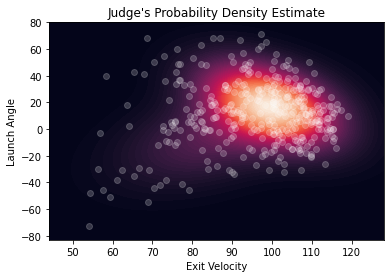

In [6]:
gaussian_mixture('mullins.csv')
gaussian_mixture('gallo.csv')
gaussian_mixture('judge.csv')